# HEART HEALTH ANALYSIS AND DISEASE PREDICTION 🫀

This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.. This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG) features, and more.



In [1]:
# Importing the importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("heart_disease_uci.csv")
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data Fields

id: Unique identifier for each patient.
    
age: Age of the patient.

sex: Sex of the patient (1 = male; 0 = female).

dataset: Specific dataset identifier (if using multiple datasets).

cp: Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).

trestbps: Resting blood pressure (in mm Hg on admission to the hospital).

chol: Serum cholesterol in mg/dl.

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg: Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy).

thalch: Maximum heart rate achieved.

exang: Exercise-induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping).

ca: Number of major vessels (0-3) colored by fluoroscopy.

thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

num: Diagnosis of heart disease (angiographic disease status) - values range from 0 (no presence) to 4.

* 0: No presence of heart disease (normal)

* 1: Minimal heart disease

* 2: Mild heart disease

* 3: Moderate heart disease

* 4: Severe heart disease

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
data.age.value_counts()

54    51
58    43
55    41
56    38
57    38
52    36
62    35
51    35
59    35
53    33
60    32
61    31
48    31
63    30
50    25
41    24
46    24
43    24
64    22
49    22
65    21
44    19
47    19
45    18
42    18
38    16
67    15
39    15
69    13
40    13
66    13
35    11
37    11
68    10
34     7
70     7
74     7
36     6
32     5
71     5
72     4
29     3
75     3
31     2
33     2
76     2
77     2
30     1
28     1
73     1
Name: age, dtype: int64

In [8]:
data.sex.value_counts()

Male      726
Female    194
Name: sex, dtype: int64

In [9]:
data.dataset.value_counts()

Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [10]:
data.cp.value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [11]:
data.trestbps.value_counts()

120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: trestbps, Length: 61, dtype: int64

In [12]:
data.chol.value_counts()

0.0      172
220.0     10
254.0     10
223.0      9
230.0      9
        ... 
360.0      1
412.0      1
358.0      1
321.0      1
385.0      1
Name: chol, Length: 217, dtype: int64

In [13]:
data.fbs.value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [14]:
data.restecg.value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [15]:
data.thalch.value_counts()

150.0    43
140.0    41
120.0    35
130.0    30
160.0    26
         ..
195.0     1
91.0      1
87.0      1
192.0     1
73.0      1
Name: thalch, Length: 119, dtype: int64

In [16]:
data.exang.value_counts()

False    528
True     337
Name: exang, dtype: int64

In [17]:
data.slope.value_counts()

flat           345
upsloping      203
downsloping     63
Name: slope, dtype: int64

In [18]:
data.ca.value_counts()

0.0    181
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [19]:
data.thal.value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [20]:
data.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [21]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [22]:
import matplotlib.pyplot as plt
from ipywidgets import interact

# Function to create pie charts for selected columns
def plot_pie(column_name):
    plt.figure(figsize=(8,8), facecolor='white')
    
    category_counts = data[column_name].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%.2f%%', startangle=90, textprops={'fontsize': 12})
    plt.title(f'Distribution of {column_name}', fontsize=15)
    plt.show()

# Get the list of columns for which you want to create pie charts
columns_for_pie = ['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'slope', 'ca', 'thal', 'num']

# Create an interactive widget with a dropdown menu
interact(plot_pie, column_name=columns_for_pie)

interactive(children=(Dropdown(description='column_name', options=('age', 'sex', 'dataset', 'cp', 'trestbps', …

<function __main__.plot_pie(column_name)>

# EDA (Exploratory Data Analysis)

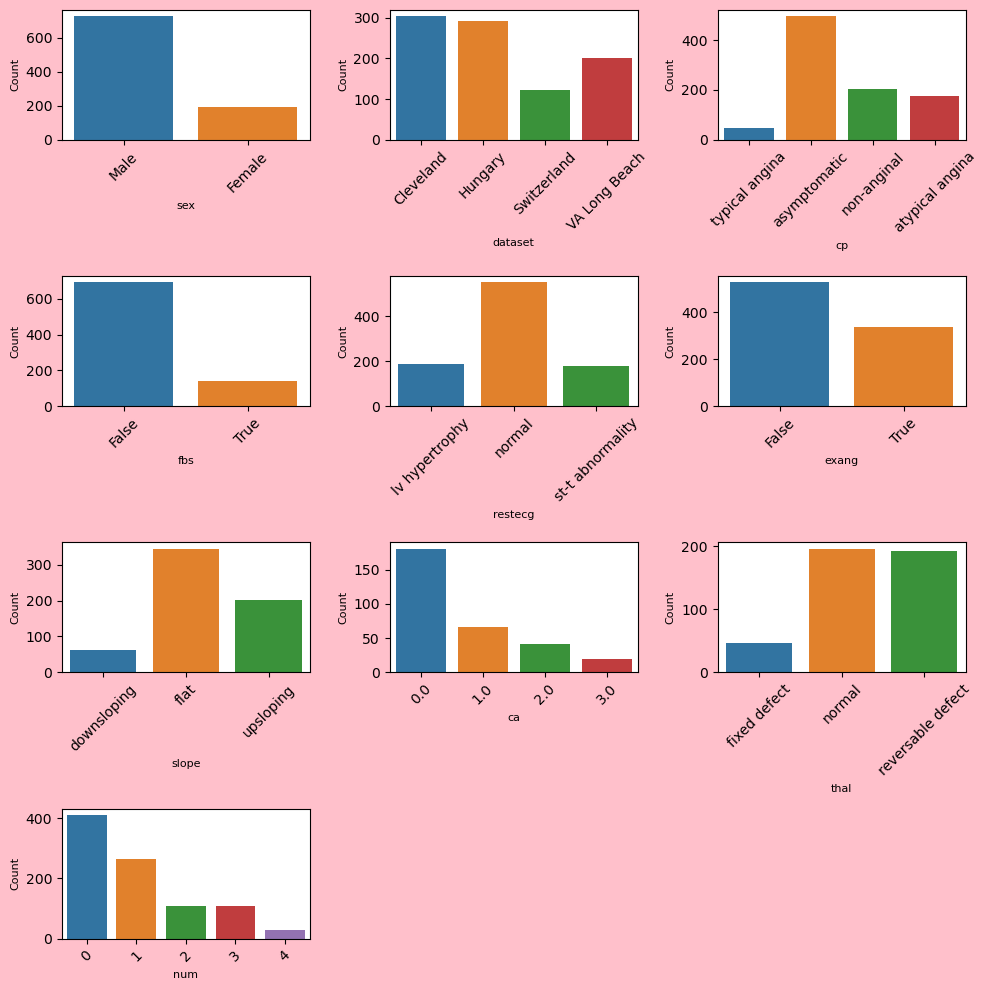

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10), facecolor='pink')

plotnumber = 1
data2 = data[['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']]
for column in data2:
    ax = plt.subplot(4, 3, plotnumber)  # Changed to 4x3 grid to fit 10 columns
    sns.countplot(x=column, data=data2, ax=ax)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()
plt.show()


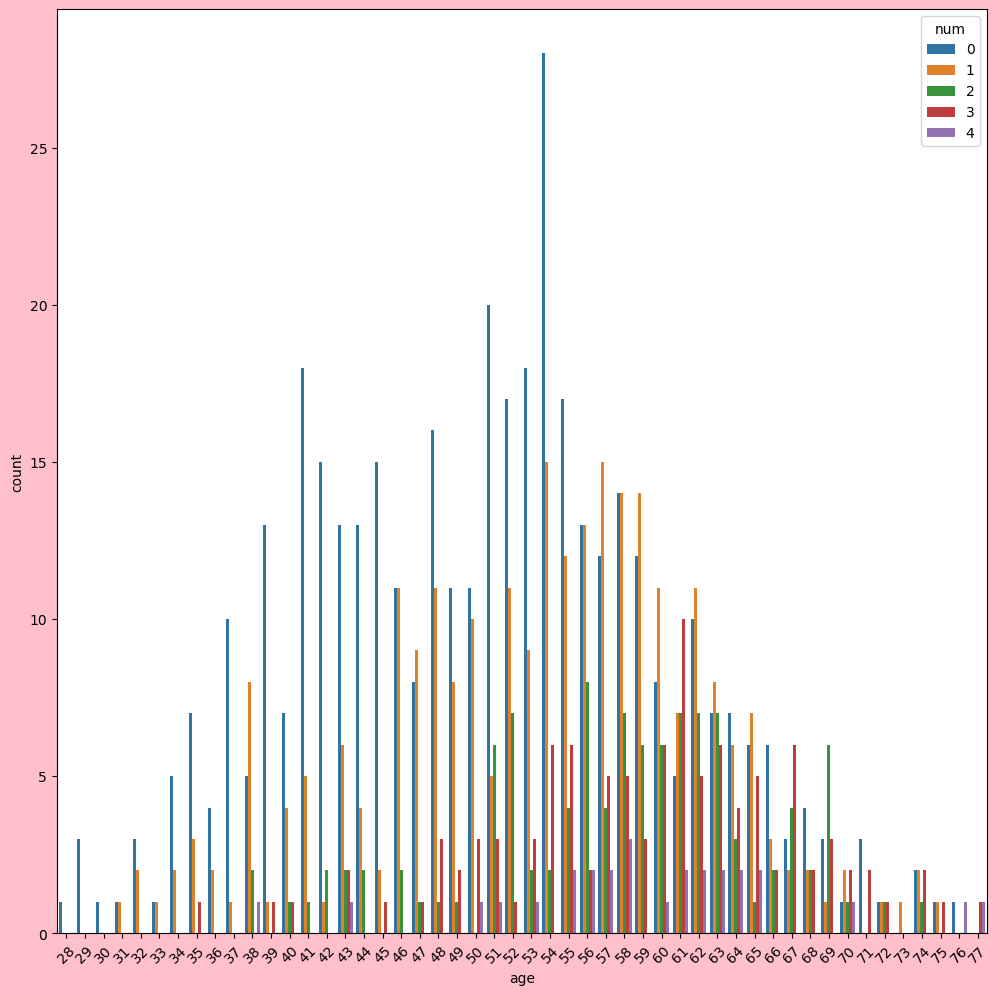

In [24]:
plt.figure(figsize=(12,12), facecolor='pink')
sns.countplot(x=data.age, hue=data.num)
plt.xticks(rotation=45)
plt.xlabel('age')
plt.show()

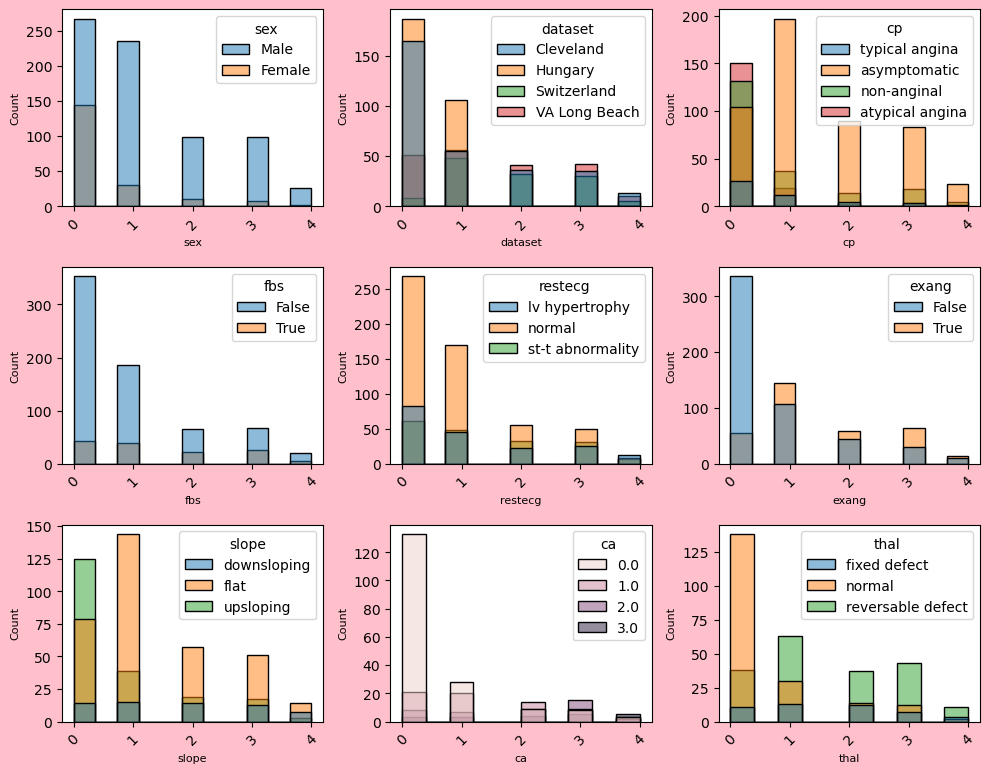

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10), facecolor='pink')

plotnumber = 1
data2 = data[['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]
for column in data2:
    ax = plt.subplot(4, 3, plotnumber)  # Changed to 4x3 grid to fit 10 columns
    sns.histplot(x=data.num, hue=column, data=data2, ax=ax)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Count', fontsize=8)
    plt.xticks(rotation=45)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data Preprocessing

## Handling null values

In [25]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [26]:
data.trestbps.fillna(120.0, inplace=True)
data.chol.fillna(199.0, inplace=True)
data.loc[data['fbs'].isnull()==True, 'fbs']=False
data.restecg.fillna('normal', inplace=True)
data.thalch.fillna(138.0, inplace=True)
data.exang.fillna(False, inplace=True)
data.oldpeak.fillna(0.0, inplace = True)


In [27]:
data.drop(data[['slope', 'ca', 'thal']], axis=1, inplace=True)
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


* Removed three columns because there was a huge amount of null values in it.

In [28]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

# Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data[['sex']])
data['dataset'] = encoder.fit_transform(data[['dataset']])
data['cp'] = encoder.fit_transform(data[['cp']])
data['fbs'] = encoder.fit_transform(data[['fbs']])
data['restecg'] = encoder.fit_transform(data[['restecg']])
data['exang'] = encoder.fit_transform(data[['exang']])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [30]:
data.restecg.value_counts()

1    553
0    188
2    179
Name: restecg, dtype: int64

#### sex
* Male : 0
* Female : 1

#### dataset
* Cleveland : 0
* Hungary : 1
* Switzerland : 2
* VA Long Beach : 3


#### cp
* asymptomatic : 0
* atypical angina : 1
* non-anginal : 2
* typical angina : 3


#### fbs
* False : 0
* True : 1

#### restecg
* lv hypertrophy : 0
* normal : 1
* st-t abnormality : 2

#### exang
* False : 0
* True : 1

In [31]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0


# Finding Outliers

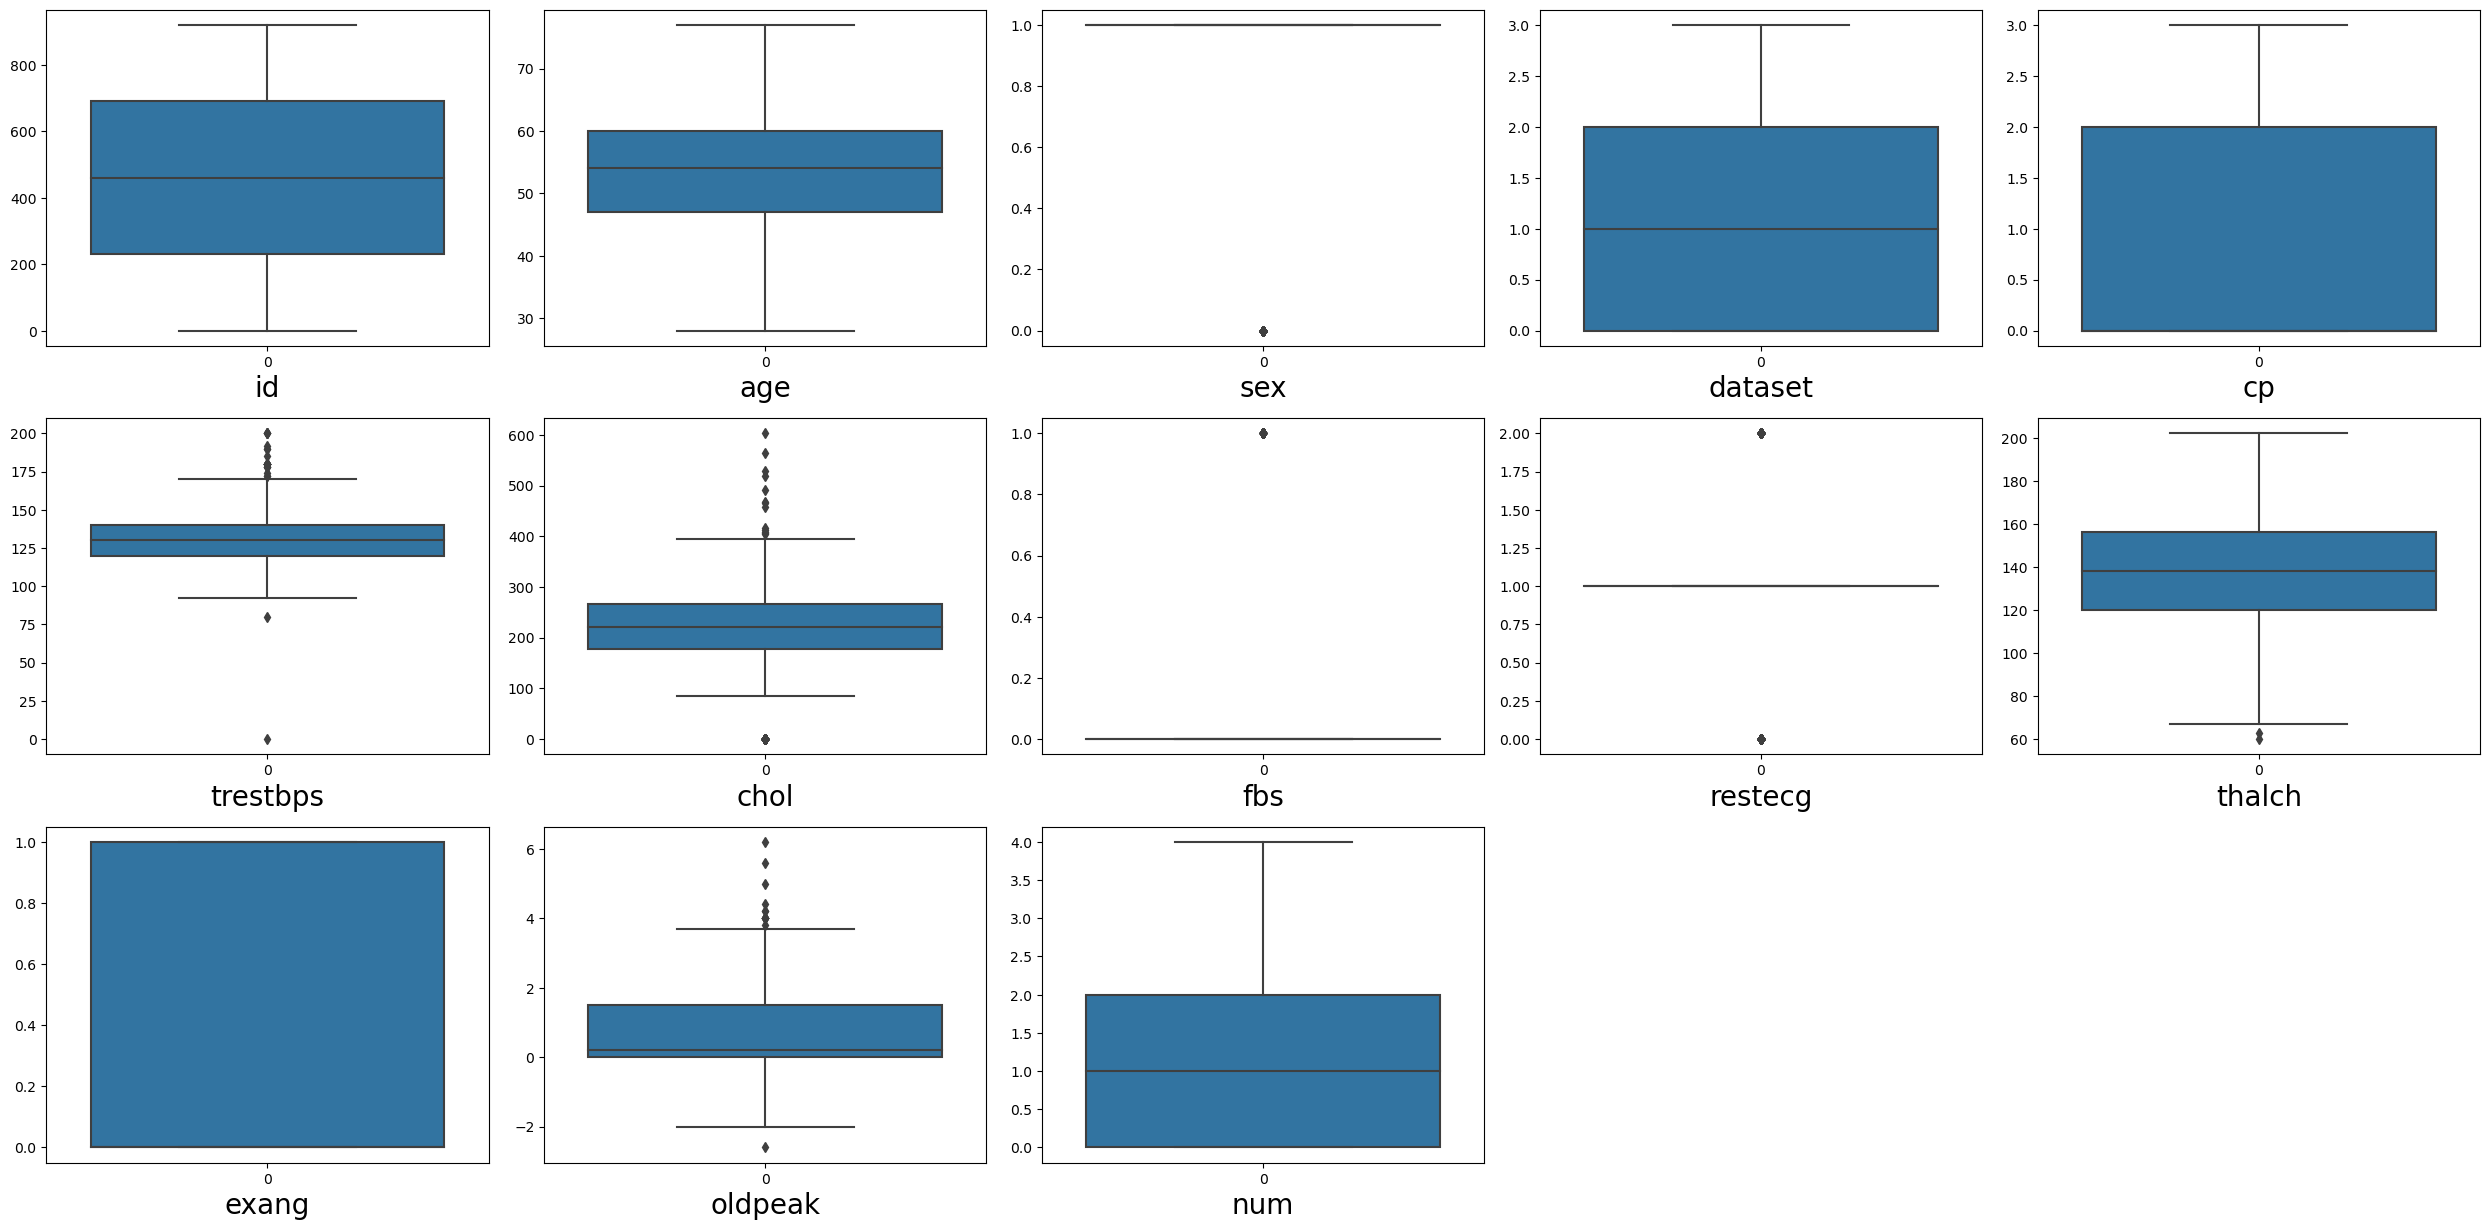

In [32]:
plt.figure(figsize=(25,20),facecolor='white')

plotnumber=1

for column in data:
    if plotnumber<=21 :
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Handling Outliers

#### For trestbps

In [33]:

from scipy import stats
IQR = stats.iqr(data.trestbps, interpolation = 'midpoint') 
IQR

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.trestbps.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.trestbps.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

print('max_limit for px_height : ',max_limit)
print('min_limit for px_height : ',min_limit)

max_limit for px_height :  170.0
min_limit for px_height :  90.0


In [34]:
data.loc[data.trestbps > max_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
14,15,52,1,0,2,172.0,199.0,1,1,162.0,0,0.5,0
83,84,68,1,0,2,180.0,274.0,1,0,150.0,1,1.6,3
126,127,56,0,0,0,200.0,288.0,1,0,133.0,1,4.0,3
172,173,59,0,0,0,174.0,249.0,0,1,143.0,1,0.0,1
183,184,59,1,0,3,178.0,270.0,0,0,145.0,0,4.2,0
188,189,54,1,0,1,192.0,283.0,0,0,195.0,0,0.0,1
201,202,64,0,0,0,180.0,325.0,0,1,154.0,1,0.0,0
213,214,66,0,0,0,178.0,228.0,1,1,165.0,1,1.0,3
231,232,55,0,0,0,180.0,327.0,0,2,117.0,1,3.4,2
338,339,39,1,1,1,190.0,241.0,0,1,106.0,0,0.0,0


In [35]:
data.loc[data.trestbps < min_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
644,645,53,1,2,0,80.0,0.0,0,1,141.0,1,2.0,0
753,754,55,1,3,2,0.0,0.0,0,1,155.0,0,1.5,3


In [36]:
data.loc[data['trestbps'] > max_limit,'trestbps']=np.median(data.trestbps)
data.loc[data['trestbps'] < min_limit,'trestbps']=np.median(data.trestbps)


In [37]:
data.loc[data.trestbps > max_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


In [38]:
data.loc[data.trestbps < min_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


#### For chol

In [39]:
from scipy import stats
IQR = stats.iqr(data.chol, interpolation = 'midpoint') 
IQR

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.chol.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.chol.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

print('max_limit for px_height : ',max_limit)
print('min_limit for px_height : ',min_limit)

max_limit for px_height :  401.25
min_limit for px_height :  43.5


In [40]:
data.loc[data.chol > max_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
48,49,65,0,0,2,140.0,417.0,1,0,157.0,0,0.8,0
121,122,63,0,0,0,150.0,407.0,0,0,154.0,0,4.0,4
152,153,67,0,0,2,115.0,564.0,0,0,160.0,0,1.6,0
181,182,56,0,0,0,134.0,409.0,0,0,150.0,1,1.9,2
373,374,44,1,1,0,150.0,412.0,0,1,170.0,0,0.0,0
434,435,53,0,1,1,113.0,468.0,0,1,127.0,0,0.0,0
500,501,40,1,1,0,120.0,466.0,0,1,152.0,1,1.0,1
528,529,32,1,1,0,118.0,529.0,0,1,130.0,0,0.0,1
546,547,54,1,1,0,130.0,603.0,1,1,125.0,1,1.0,1
566,567,52,1,1,0,140.0,404.0,0,1,124.0,1,2.0,1


In [41]:
data.loc[data.chol < min_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
597,598,32,1,2,3,95.0,0.0,0,1,127.0,0,0.7,1
598,599,34,1,2,0,115.0,0.0,0,1,154.0,0,0.2,1
599,600,35,1,2,0,120.0,0.0,0,1,130.0,1,0.0,3
600,601,36,1,2,0,110.0,0.0,0,1,125.0,1,1.0,1
601,602,38,0,2,0,105.0,0.0,0,1,166.0,0,2.8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,1,3,0,122.0,0.0,0,1,120.0,0,0.5,1
819,820,63,1,3,2,130.0,0.0,1,2,160.0,0,3.0,0
822,823,48,1,3,2,102.0,0.0,0,2,110.0,1,1.0,1
839,840,56,1,3,0,120.0,0.0,0,0,138.0,0,0.0,1


In [42]:
data.loc[data['chol'] > max_limit,'chol']=np.median(data.chol)
data.loc[data['chol'] < min_limit,'chol']=np.median(data.chol)

In [43]:
data.loc[data.chol > max_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


In [44]:
data.loc[data.chol < min_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


#### For oldpeak

In [45]:
from scipy import stats
IQR = stats.iqr(data.oldpeak, interpolation = 'midpoint') 
IQR

## min and max limit calculation

# First quartile (Q1) 
Q1 = data.oldpeak.quantile(0.25)

# Third quartile (Q3) 
Q3 =data.oldpeak.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

print('max_limit for px_height : ',max_limit)
print('min_limit for px_height : ',min_limit)

max_limit for px_height :  3.75
min_limit for px_height :  -2.25


In [46]:
data.loc[data.oldpeak > max_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
91,92,62,0,0,0,160.0,164.0,0,0,145.0,0,6.2,3
121,122,63,0,0,0,150.0,221.0,0,0,154.0,0,4.0,4
123,124,55,1,0,0,140.0,217.0,0,1,111.0,1,5.6,3
126,127,56,0,0,0,130.0,288.0,1,0,133.0,1,4.0,3
183,184,59,1,0,3,130.0,270.0,0,0,145.0,0,4.2,0
191,192,51,1,0,0,140.0,298.0,0,1,122.0,1,4.2,3
211,212,38,1,0,3,120.0,231.0,0,1,182.0,1,3.8,4
285,286,58,1,0,0,114.0,318.0,0,2,140.0,0,4.4,4
293,294,63,1,0,0,140.0,187.0,0,0,144.0,1,4.0,2
567,568,52,1,1,0,160.0,246.0,0,2,82.0,1,4.0,1


In [47]:
data.loc[data.oldpeak < min_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
615,616,46,1,2,0,100.0,221.0,0,2,133.0,0,-2.6,1


In [48]:
data.loc[data['oldpeak'] > max_limit,'oldpeak']=np.median(data.oldpeak)
data.loc[data['oldpeak'] < min_limit,'oldpeak']=np.median(data.oldpeak)

In [49]:
data.loc[data.oldpeak > max_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


In [50]:
data.loc[data.oldpeak < min_limit]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num


# Scaling 

In [51]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,2
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0,3,0,127.0,333.0,1,2,154.0,0,0.0,1
916,917,62,1,3,3,120.0,139.0,0,2,138.0,0,0.0,0
917,918,55,1,3,0,122.0,223.0,1,2,100.0,0,0.0,2
918,919,58,1,3,0,120.0,385.0,1,0,138.0,0,0.0,0


In [52]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df = data[['age','trestbps','chol','thalch','oldpeak']]
scaled_data = sc.fit_transform(df)
scaled_data

array([[0.71428571, 0.67948718, 0.4789644 , 0.63380282, 0.75438596],
       [0.79591837, 0.87179487, 0.65048544, 0.33802817, 0.61403509],
       [0.79591837, 0.35897436, 0.46601942, 0.48591549, 0.80701754],
       ...,
       [0.55102041, 0.38461538, 0.44660194, 0.28169014, 0.35087719],
       [0.6122449 , 0.35897436, 0.97087379, 0.54929577, 0.35087719],
       [0.69387755, 0.35897436, 0.54692557, 0.23239437, 0.35087719]])

In [53]:
df2 = pd.DataFrame(scaled_data, columns=['age','trestbps','chol','thalch','oldpeak'])
df2

,age,trestbps,chol,thalch,oldpeak
0,0.714286,0.679487,0.478964,0.633803,0.754386
1,0.795918,0.871795,0.650485,0.338028,0.614035
2,0.795918,0.358974,0.466019,0.485915,0.807018
3,0.183673,0.487179,0.533981,0.894366,0.964912
4,0.265306,0.487179,0.385113,0.788732,0.596491
...,...,...,...,...,...
915,0.530612,0.448718,0.802589,0.661972,0.350877
916,0.693878,0.358974,0.174757,0.549296,0.350877
917,0.551020,0.384615,0.446602,0.281690,0.350877
918,0.612245,0.358974,0.970874,0.549296,0.350877


In [54]:
final_data = pd.concat([df2, data[['sex','dataset','cp','fbs','restecg','exang','num']]],axis=1)
final_data.head()

,age,trestbps,chol,thalch,oldpeak,sex,dataset,cp,fbs,restecg,exang,num
0,0.714286,0.679487,0.478964,0.633803,0.754386,1,0,3,1,0,0,0
1,0.795918,0.871795,0.650485,0.338028,0.614035,1,0,0,0,0,1,2
2,0.795918,0.358974,0.466019,0.485915,0.807018,1,0,0,0,0,1,1
3,0.183673,0.487179,0.533981,0.894366,0.964912,1,0,2,0,1,0,0
4,0.265306,0.487179,0.385113,0.788732,0.596491,0,0,1,0,0,0,0


# Feature Selection

In [55]:
heat = final_data[['age','trestbps','chol','thalch','oldpeak','sex','dataset','cp','fbs','restecg','exang']]

<Axes: >

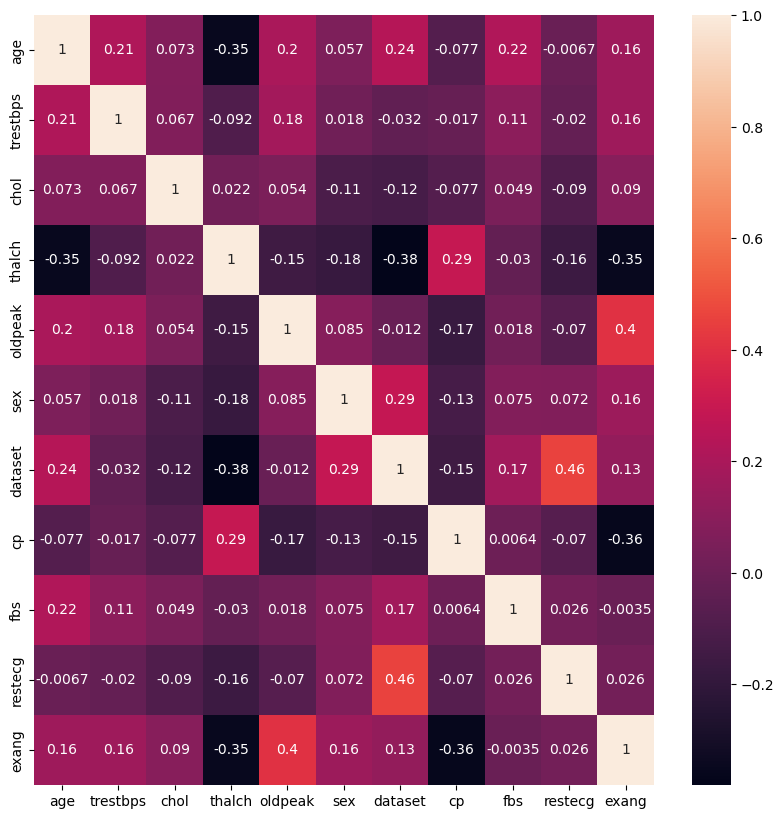

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(heat.corr(), annot=True)

* As we can see there is not much correlation between the any two columns, hence we cannot remove any column further.

# Model Creation

In [57]:
X = final_data.iloc[:,:-1]
y = final_data.num
X

,age,trestbps,chol,thalch,oldpeak,sex,dataset,cp,fbs,restecg,exang
0,0.714286,0.679487,0.478964,0.633803,0.754386,1,0,3,1,0,0
1,0.795918,0.871795,0.650485,0.338028,0.614035,1,0,0,0,0,1
2,0.795918,0.358974,0.466019,0.485915,0.807018,1,0,0,0,0,1
3,0.183673,0.487179,0.533981,0.894366,0.964912,1,0,2,0,1,0
4,0.265306,0.487179,0.385113,0.788732,0.596491,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
915,0.530612,0.448718,0.802589,0.661972,0.350877,0,3,0,1,2,0
916,0.693878,0.358974,0.174757,0.549296,0.350877,1,3,3,0,2,0
917,0.551020,0.384615,0.446602,0.281690,0.350877,1,3,0,1,2,0
918,0.612245,0.358974,0.970874,0.549296,0.350877,1,3,0,1,0,0


In [58]:
y

0      0
1      2
2      1
3      0
4      0
      ..
915    1
916    0
917    2
918    0
919    1
Name: num, Length: 920, dtype: int64

## Train Test Split

In [59]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 45)

In [60]:
y_train.value_counts()

0    338
1    206
2     89
3     78
4     25
Name: num, dtype: int64

## Smoting Technique

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [62]:
y_train_smote.value_counts()

0    338
1    338
3    338
2    338
4    338
Name: num, dtype: int64

# Model Evaluation

In [64]:
# improt ALl models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score


#importing pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost Classifier', AdaBoostClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGboost Classifier', XGBClassifier(random_state=42)),   
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross validation
    scores = cross_val_score(pipeline, X_train_smote, y_train_smote, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_smote, y_train_smote)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross Validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Logistic Regression
Cross Validation Accuracy: 0.4769230769230769
Test Accuracy: 0.44565217391304346

Model: Gradient Boosting
Cross Validation Accuracy: 0.6881656804733728
Test Accuracy: 0.5

Model: KNeighbors Classifier
Cross Validation Accuracy: 0.7047337278106508
Test Accuracy: 0.4782608695652174

Model: Decision Tree Classifier
Cross Validation Accuracy: 0.6792899408284023
Test Accuracy: 0.44021739130434784

Model: AdaBoost Classifier
Cross Validation Accuracy: 0.48698224852071004
Test Accuracy: 0.44021739130434784

Model: Random Forest
Cross Validation Accuracy: 0.8183431952662721
Test Accuracy: 0.5

Model: XGboost Classifier
Cross Validation Accuracy: 0.7798816568047338
Test Accuracy: 0.5434782608695652

Model: Support Vector Machine
Cross Validation Accuracy: 0.5485207100591716
Test Accuracy: 0.483695652173913

Model: Naive Bayes Classifier
Cross Validation Accuracy: 0.4325443786982248
Test Accuracy: 0.40217391304347827

Best Model: Pipeline(steps=[('model', RandomForest

# CONCLUSION:-
The Random Forest model emerged as the best performer with the highest cross-validation accuracy of 0.818 and a test accuracy of 0.5. Despite some models like XGBoost and KNeighbors showing strong performance, Random Forest was selected due to its overall superior performance and robustness.